# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining

In [1]:
# Import necessaary Libraries
import numpy as np
import pandas as pd

# Loading the data

In [2]:
data = pd.read_excel(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Text Mining\Amazon_Reviews.xlsx')
data.shape

(100, 1)

In [3]:
data.head(2)

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...


In [4]:
data.isnull().sum()

Text    0
dtype: int64

No missing values found

# Text Processing

In [6]:
# Removing both the leading and the trailing characters
data=[Text.strip() for Text in data.Text] 

# Removing empty strings, because they are considered in Python as False
data=[Text for Text in data if Text] 
data[0:10]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

In [7]:
# Joining the list into one string/text
data_text = ' ' .join(data)
data_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch. If you are looking for the secret

In [8]:
# Removing Punctuations
import string
no_punc_text = data_text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

# This line of code removes punctuation from the variable tweets_tokens_text using the translate method in combination with
# str.maketrans

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality The product looks more like a stew than a processed meat and it smells better My Labrador is finicky and she appreciates this product better than  most Product arrived labeled as Jumbo Salted Peanutsthe peanuts were actually small sized unsalted Not sure if this was an error or if the vendor intended to represent the product as Jumbo This is a confection that has been around a few centuries  It is a light pillowy citrus gelatin with nuts  in this case Filberts And it is cut into tiny squares and then liberally coated with powdered sugar  And it is a tiny mouthful of heaven  Not too chewy and very flavorful  I highly recommend this yummy treat  If you are familiar with the story of CS Lewis The Lion The Witch and The Wardrobe  this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch If you are looking for the secret ingredient in Robitussin I b

In [9]:
# Removing https or url within text
import re
no_url_text = re.sub(r'http\S+', '', no_punc_text )
no_url_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality The product looks more like a stew than a processed meat and it smells better My Labrador is finicky and she appreciates this product better than  most Product arrived labeled as Jumbo Salted Peanutsthe peanuts were actually small sized unsalted Not sure if this was an error or if the vendor intended to represent the product as Jumbo This is a confection that has been around a few centuries  It is a light pillowy citrus gelatin with nuts  in this case Filberts And it is cut into tiny squares and then liberally coated with powdered sugar  And it is a tiny mouthful of heaven  Not too chewy and very flavorful  I highly recommend this yummy treat  If you are familiar with the story of CS Lewis The Lion The Witch and The Wardrobe  this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch If you are looking for the secret ingredient in Robitussin I b

In [14]:
import nltk

# Tokenization 
from nltk.tokenize import word_tokenize
data_text_tokens = word_tokenize(no_url_text)
print(data_text_tokens[0:50])

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', 'Product', 'arrived']


In [15]:
len(data_text_tokens)

6616

In [16]:
# Noramalize the data
lower_words = [x.lower() for x in data_text_tokens]
print(lower_words[0:30])

['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'the', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a']


All the words are in lower case

In [18]:
# Removing Stopwords

from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')

# Getting the list of English stopwords
stop_words = stopwords.words('english')

# Adding additional stop words if needed
stop_words.append('the')

# Remove stopwords from the list of word tokens
no_stop_words = [word for word in lower_words if not word in stop_words]
print(no_stop_words[0:50])

# Trying to remove common English stopwords from a list of word tokens. The code you provided is using the Natural Language
# Toolkit (NLTK) library to get a list of English stopwords and then removing those stopwords from a list of word tokens.
# stopwords.words('english'): Retrieves a list of common English stopwords from the NLTK library.
# my_stop_words.append('the'): Adds the word 'the' to the list of stopwords. You can customize this list by appending more
# words if needed.
# List comprehension: Creates a new list (no_stop_tokens) by iterating through each word in text_tokens and including only 
# those words that are not in the list of stopwords.
# print(no_stop_tokens[:40]): Prints the first 40 tokens from the list after removing stopwords.

['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better', 'product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanutsthe', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo', 'confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case']


In [20]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in no_stop_words]
print(stemmed_words[0:40])

['bought', 'sever', 'vital', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicki', 'appreci', 'product', 'better', 'product', 'arriv', 'label', 'jumbo', 'salt', 'peanutsth', 'peanut', 'actual', 'small', 'size', 'unsalt', 'sure', 'error', 'vendor', 'intend', 'repres', 'product']


In [22]:
import spacy
nlp = spacy.load('en_core_web_sm')

# spaCy is widely used in industry and academia for tasks such as text processing, named entity recognition, 
# part-of-speech tagging, parsing, and more.

In [23]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_words))
print(doc[0:40])

bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted sure error vendor intended represent product


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['buy', 'several', 'vitality', 'can', 'dog', 'food', 'product', 'find', 'good', 'quality', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'well', 'labrador', 'finicky', 'appreciate', 'product', 'well', 'product', 'arrive']


In [25]:
clean_data = ' ' .join(lemmas)
clean_data

'buy several vitality can dog food product find good quality product look like stew process meat smell well labrador finicky appreciate product well product arrive label jumbo salt peanutsthe peanut actually small sized unsalted sure error vendor intend represent product jumbo confection around century light pillowy citrus gelatin nuts case filbert cut tiny square liberally coat powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduce edmund sell brother sister witch look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal great taffy great price wide assortment yummy taffy delivery quick taffy lover deal get wild hair taffy order five pound bag taffy enjoyable many flavor watermelon root beer melon peppermint grape etc complaint bit much redblack licoriceflavore piece particular favorite kid husband last two week would recommend brand taffy

# Feature Extraction

# 1. Count Vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data_cv = cv.fit_transform(lemmas)

# CountVectorizer: It's a method from scikit-learn used to convert a collection of text documents to a matrix of token counts. 
# Each row in the matrix corresponds to a document, and each column corresponds to a unique word in the entire collection.
# fit_transform method is used to learn the vocabulary (unique words) from the lemmatized text data (lemmas) and 
# transform the text data into a matrix of token counts.
# data_cv will contain the transformed data in the form of a matrix

In [28]:
print(cv.vocabulary_)

{'buy': 173, 'several': 977, 'vitality': 1196, 'can': 181, 'dog': 317, 'food': 426, 'product': 869, 'find': 408, 'good': 469, 'quality': 880, 'look': 656, 'like': 642, 'stew': 1059, 'process': 867, 'meat': 688, 'smell': 1013, 'well': 1214, 'labrador': 615, 'finicky': 410, 'appreciate': 81, 'arrive': 89, 'label': 614, 'jumbo': 597, 'salt': 946, 'peanutsthe': 807, 'peanut': 805, 'actually': 34, 'small': 1012, 'sized': 1005, 'unsalted': 1178, 'sure': 1085, 'error': 357, 'vendor': 1190, 'intend': 578, 'represent': 918, 'confection': 237, 'around': 87, 'century': 197, 'light': 641, 'pillowy': 826, 'citrus': 217, 'gelatin': 453, 'nuts': 756, 'case': 190, 'filbert': 406, 'cut': 273, 'tiny': 1140, 'square': 1043, 'liberally': 637, 'coat': 221, 'powdered': 852, 'sugar': 1075, 'mouthful': 718, 'heaven': 526, 'chewy': 202, 'flavorful': 419, 'highly': 534, 'recommend': 903, 'yummy': 1252, 'treat': 1154, 'familiar': 389, 'story': 1068, 'cs': 269, 'lewis': 636, 'lion': 646, 'witch': 1233, 'wardrobe'

Counts of some specific lemmas

In [29]:
print(cv.get_feature_names_out()[100:200])
# This prints a subset of feature names from index 100 to 199

['away' 'awesome' 'awful' 'baby' 'back' 'bad' 'bag' 'baggie' 'balance'
 'ball' 'balloon' 'bang' 'basenjijack' 'batch' 'battery' 'be'
 'beachthemed' 'bean' 'bear' 'beauty' 'become' 'bed' 'beef' 'beer'
 'behind' 'believe' 'berry' 'beverage' 'beware' 'bichon' 'big' 'bike'
 'bind' 'bit' 'bitter' 'black' 'blend' 'bliss' 'bloat' 'blonde' 'bloody'
 'blow' 'blue' 'body' 'boil' 'boiling' 'book' 'boot' 'boring' 'boston'
 'bottle' 'bottled' 'bottom' 'bough' 'bowl' 'box' 'boxbr' 'boy' 'br'
 'brand' 'break' 'breakfast' 'breed' 'bring' 'brother' 'brown' 'brunch'
 'buck' 'buddy' 'buggy' 'bulldog' 'bummedbr' 'burn' 'buy' 'buyer' 'buying'
 'byproduct' 'cactus' 'calorie' 'came' 'camelbak' 'can' 'candies' 'candy'
 'candysoda' 'cane' 'carb' 'carbohydrate' 'carbonationbr' 'carry' 'case'
 'cast' 'caster' 'cat' 'cause' 'celiac' 'cent' 'century' 'chance' 'change']


In [30]:
print(data_cv.toarray()[100:200])
# Printing a subset of the dense array representation

# toarray() method is used to convert the sparse matrix representation obtained from CountVectorizer into a dense NumPy array.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
print(data_cv.toarray().shape)

(3519, 1256)


# 2. Count Vectorizer with N-grams

In [32]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range = (1,3),max_features = 50)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

# analyzer='word': This specifies that the analyzer should consider words as the basic units. 

In [33]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['also' 'apple' 'bag' 'balance' 'br' 'brand' 'brown' 'buy' 'candy' 'could'
 'do' 'dog' 'eat' 'find' 'flavor' 'food' 'get' 'go' 'good' 'great' 'hot'
 'instant' 'like' 'little' 'love' 'make' 'mccann' 'much' 'natural' 'not'
 'oatmeal' 'one' 'order' 'pack' 'price' 'product' 'really' 'recommend'
 'store' 'sugar' 'take' 'taste' 'time' 'try' 'use' 'variety' 've' 'water'
 'well' 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 3. TF-IDF Vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features = TfidfVectorizer(norm ='l2', analyzer ='word',ngram_range = (1,3), max_features = 50)
tfidf_matix_ngram = tfidfv_ngram_max_features.fit_transform(lemmas)

# l2' stands for Euclidean norm, and it normalizes the vectors to have a Euclidean norm of 1

In [35]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['also' 'apple' 'bag' 'balance' 'br' 'brand' 'brown' 'buy' 'candy' 'could'
 'do' 'dog' 'eat' 'find' 'flavor' 'food' 'get' 'go' 'good' 'great' 'hot'
 'instant' 'like' 'little' 'love' 'make' 'mccann' 'much' 'natural' 'not'
 'oatmeal' 'one' 'order' 'pack' 'price' 'product' 'really' 'recommend'
 'store' 'sugar' 'take' 'taste' 'time' 'try' 'use' 'variety' 've' 'water'
 'well' 'would']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Generating Word Cloud

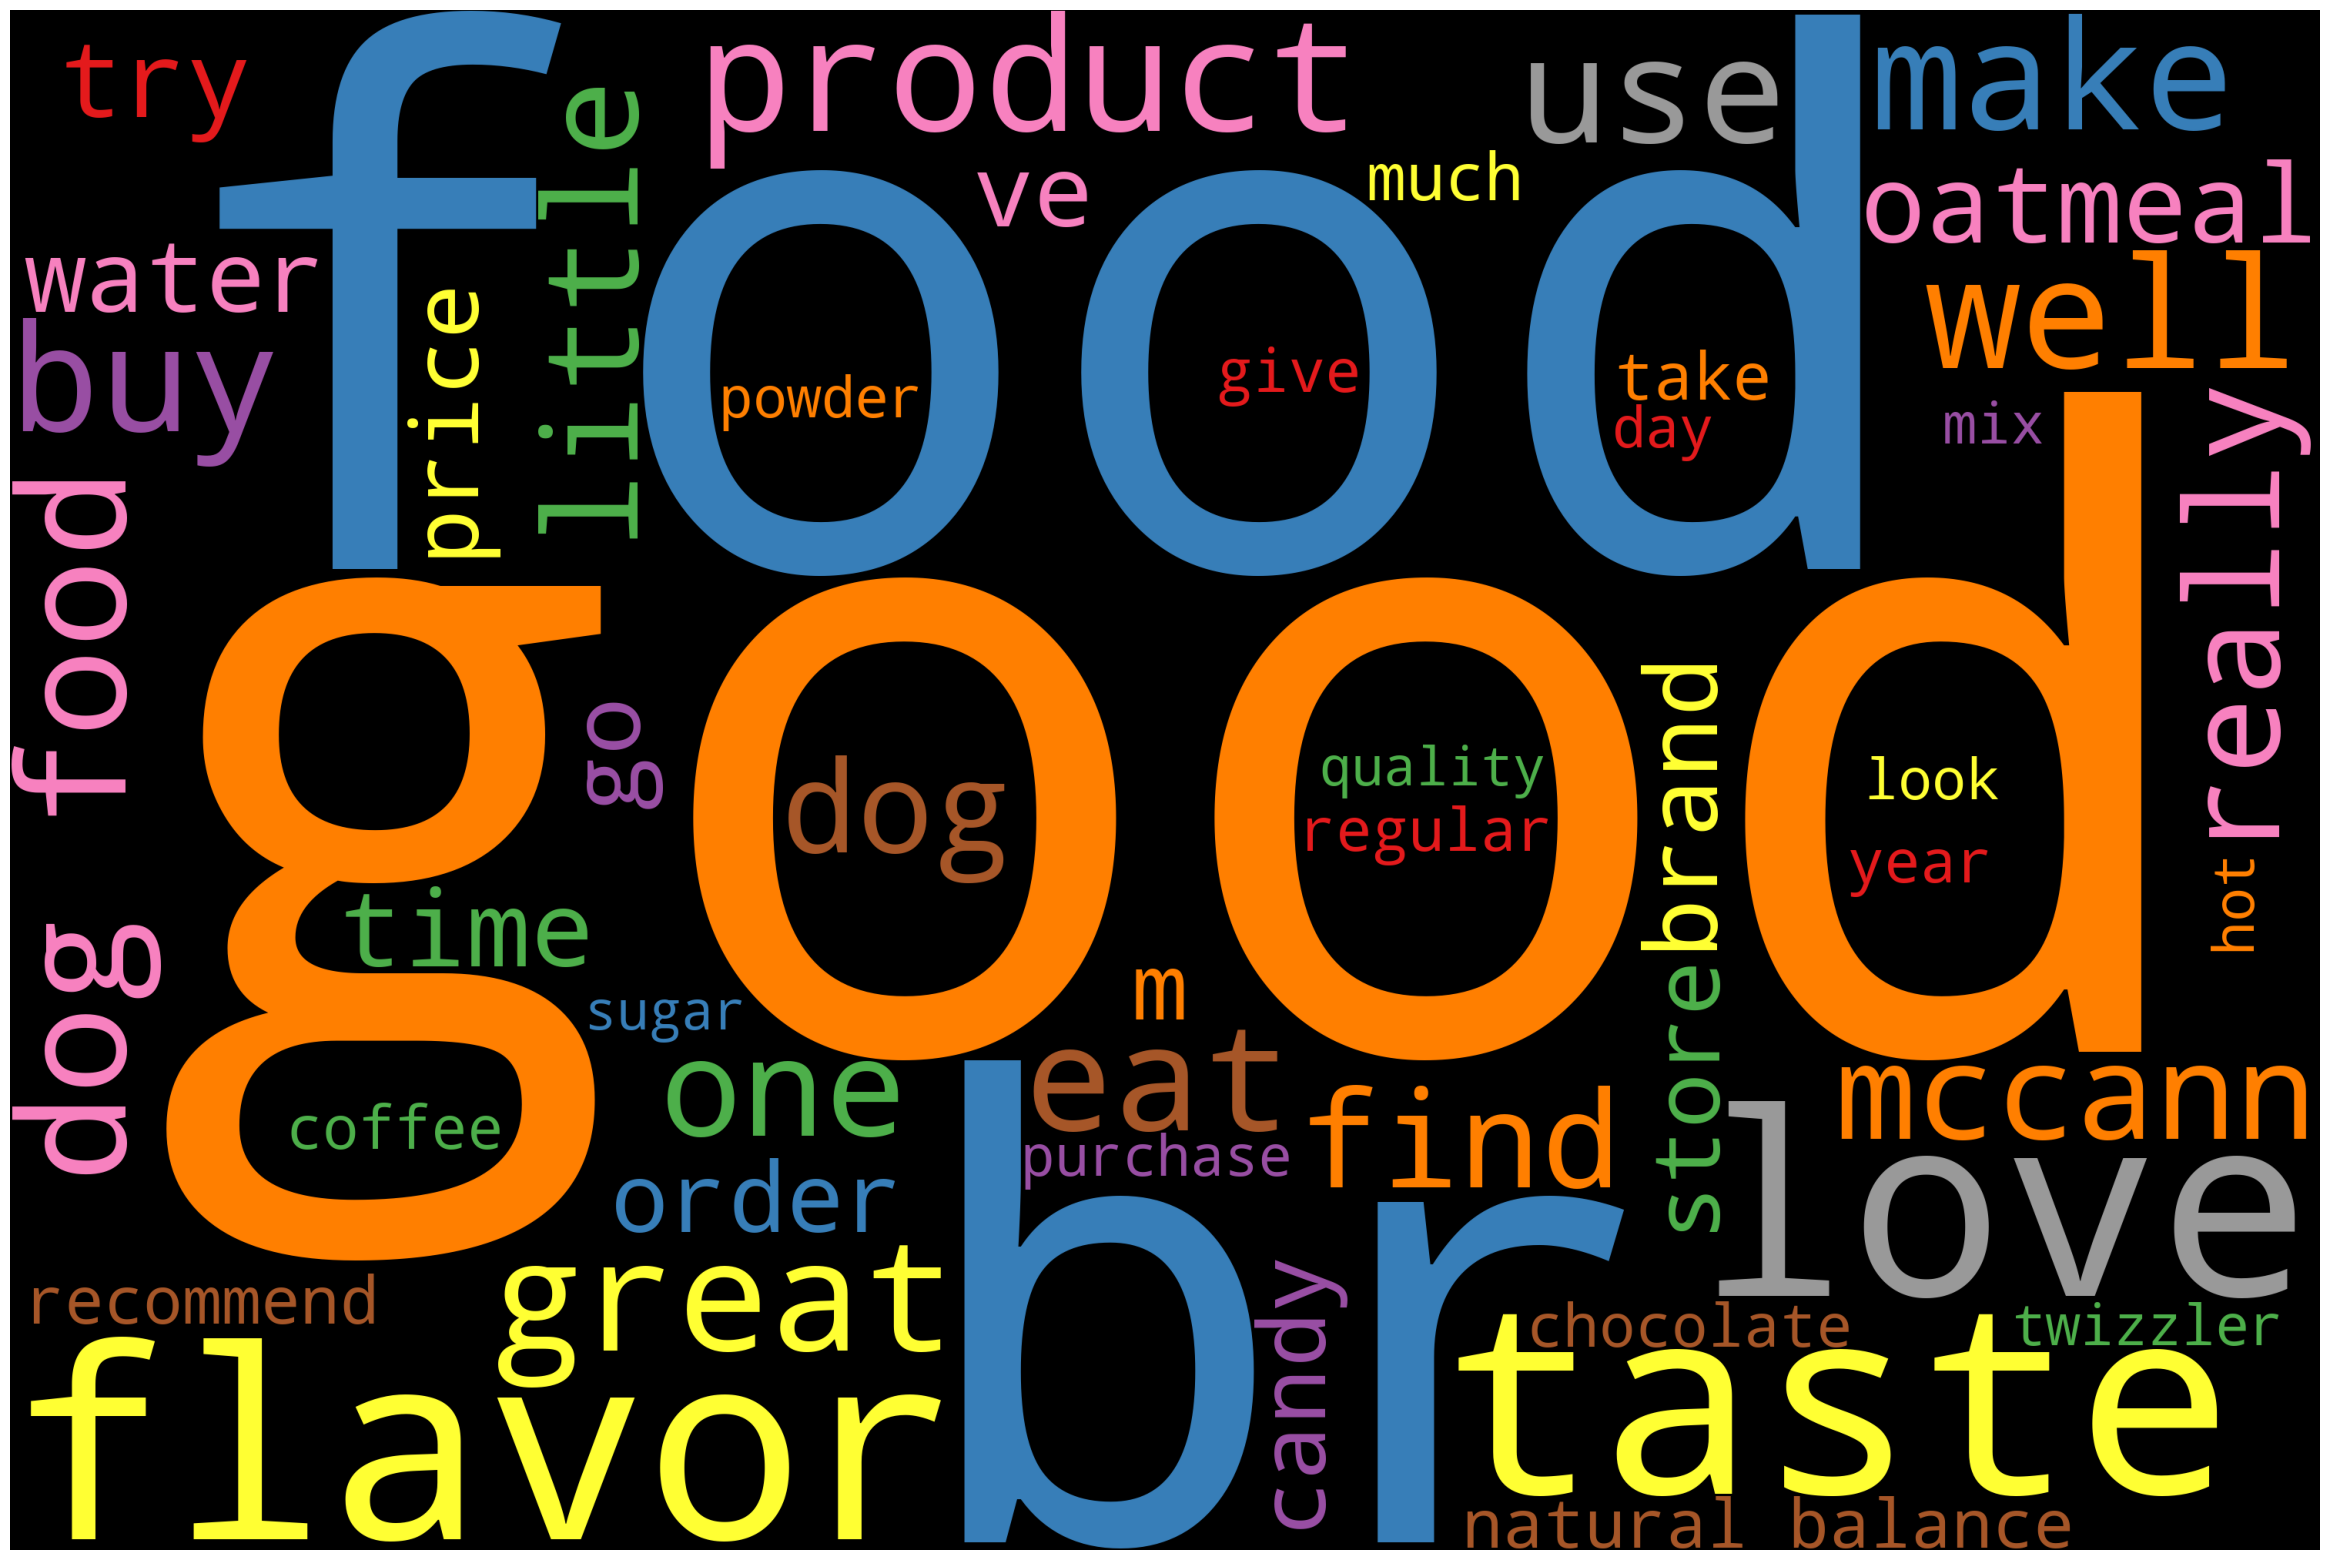

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Generating Word Cloud
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=50,
                      colormap='Set1', stopwords=STOPWORDS).generate(clean_data)

# Plot Word Cloud
plot_cloud(wordcloud)

# Emotion Mining

In [41]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))
sentences

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality.',
 'The product looks more like a stew than a processed meat and it smells better.',
 'My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted.',
 'Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.',
 'It is a light, pillowy citrus gelatin with nuts - in this case Filberts.',
 'And it is cut into tiny squares and then liberally coated with powdered sugar.',
 'And it is a tiny mouthful of heaven.',
 'Not too chewy, and very flavorful.',
 'I highly recommend this yummy treat.',
 'If you are familiar with the story of C.S.',
 'Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to 

In [42]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df.shape

(403, 1)

In [47]:
import spacy

affinity_scores = {'good': 1, 'bad': -1, 'positive': 2, 'sad': -2}

nlp = spacy.load('en_core_web_sm')

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
    return sent_score

# Example usage
text_to_analyze = "I have bought several of the Vitality canned dog food products and have found them all to be of good quality"
result = calculate_sentiment(text_to_analyze)
print(result)

1


In [48]:
# manual testing
calculate_sentiment(text='great')

0

In [49]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      1
1      0
2      0
3      0
4      0
      ..
398    0
399    0
400    0
401    0
402    0
Name: sentiment_value, Length: 403, dtype: int64

In [219]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      21
1      15
2      12
3      13
4      18
       ..
398    26
399    11
400    13
401     7
402     4
Name: word_count, Length: 403, dtype: int64

In [50]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value
242,"It's not terrible, but it's bad enough that I ...",-2
147,In my 1300watt microwave the oatmeal cooks up ...,-2
315,I use it to make my own coffee creamer.<br /><...,-1
284,Some people can use maltitol to their heart's ...,-1
246,this was sooooo deliscious but too bad i ate e...,-1
...,...,...
38,Good for their digestion.,1
0,I have bought several of the Vitality canned d...,1
104,"There is no escaping the fact, however, that e...",2
114,This is a good instant oatmeal from the best o...,2


In [51]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    403.000000
mean       0.101737
std        0.388993
min       -2.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: sentiment_value, dtype: float64

In [52]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
1,The product looks more like a stew than a proc...,0
2,My Labrador is finicky and she appreciates thi...,0
3,Product arrived labeled as Jumbo Salted Peanut...,0
4,Not sure if this was an error or if the vendor...,0
5,This is a confection that has been around a fe...,0
...,...,...
398,It's for dogs that need a limited diet who can...,0
399,I fed this to my Golden Retriever and he hated...,0
400,"He wouldn't eat it, and when he did, it gave h...",0
401,We will not be buying this again.,0


In [223]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,I have bought several of the Vitality canned d...,1,21
14,I got this in addition to the Root Beer Extrac...,1,20
30,This taffy is so good.,1,5
38,Good for their digestion.,1,4
39,Also good for small puppies.,1,5
55,good flavor!,1,2
62,I love eating them and they are good for watch...,1,15
100,).<br />The little Dolche Guesto Machine is su...,1,27
102,Too good for the price and I'am getting one my...,1,10
104,"There is no escaping the fact, however, that e...",2,28
